<a href="https://colab.research.google.com/github/aakashkumarme/DeepLearning_/blob/main/2_CNN_e2e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import and become one with the data
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-22 19:51:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   252MB/s    in 0.4s    

2021-05-22 19:51:44 (252 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [52]:
#visualize the data
# View an image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


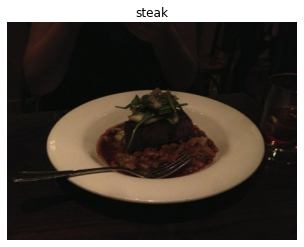

In [53]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)
Image shape: (512, 306, 3)


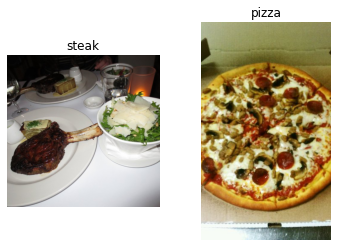

In [54]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("/content/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("/content/pizza_steak/train/", "pizza")

In [55]:
# Define training and test directory paths
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

In [56]:
#Our next step is to turn our data into batches.
#Reason
#10,000 images (or more) might not fit into the memory of your processor (GPU).
#Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) #The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).
test_datagen = ImageDataGenerator(rescale=1/255.)


# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [58]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

In [59]:
#Create a model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
         Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 1.1505 - accuracy: 0.5856 - val_loss: 0.5203 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.5171 - accuracy: 0.7468 - val_loss: 0.4845 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4013 - accuracy: 0.8250 - val_loss: 0.4430 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3171 - accuracy: 0.8830 - val_loss: 0.4339 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.2148 - accuracy: 0.9303 - val_loss: 0.4365 - val_accuracy: 0.8000


Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though 
they have 3 colour channels, the convolutions are run on each channel invididually.

filters - these are the number of "feature extractors" that will be moving over our images.

kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.

padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [60]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


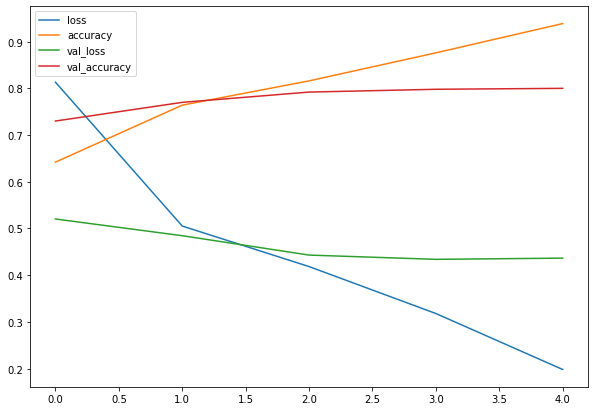

In [61]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [62]:
# Plot the validation and training data separately
def plot_loss_curves(plotdata):

  loss = plotdata.history['loss']
  val_loss = plotdata.history['val_loss']
  ###
  accuracy = plotdata.history['accuracy']
  val_accuracy = plotdata.history['val_accuracy']

  epochs = range(len(plotdata.history['loss']))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

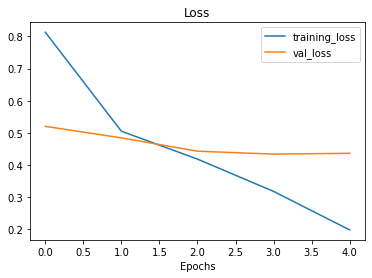

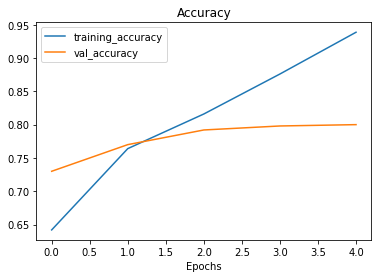

In [63]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [64]:
model_4.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


**Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output**

In [65]:
#Basic structure of CNN with max pooling
#Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
#Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer

model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half #Max Pooling layer is figuring out the most important of those features
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model 
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.6454 - accuracy: 0.6026 - val_loss: 0.4937 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5024 - accuracy: 0.7523 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4636 - accuracy: 0.7826 - val_loss: 0.3814 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3994 - accuracy: 0.8188 - val_loss: 0.3428 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3706 - accuracy: 0.8437 - val_loss: 0.3216 - val_accuracy: 0.8760


In [66]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

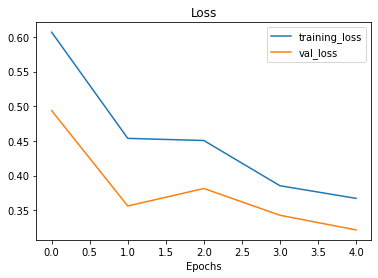

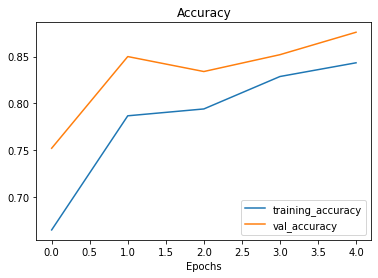

In [67]:
#This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

plot_loss_curves(history_5)


In [68]:
# We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

*A ConvNet with max pooling and data augmentation*

In [69]:
#Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [70]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   #shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle
                                                                   shuffle = True)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [71]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

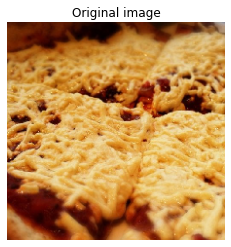

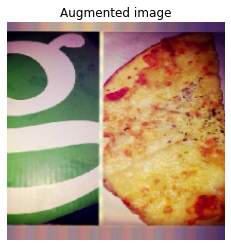

In [72]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [73]:
# Create the model
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.7026 - accuracy: 0.5133 - val_loss: 0.5672 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 19s 411ms/step - loss: 0.6130 - accuracy: 0.6726 - val_loss: 0.4193 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 19s 411ms/step - loss: 0.5193 - accuracy: 0.7553 - val_loss: 0.4634 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 19s 413ms/step - loss: 0.5301 - accuracy: 0.7426 - val_loss: 0.3380 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 19s 413ms/step - loss: 0.4910 - accuracy: 0.7851 - val_loss: 0.3456 - val_accuracy: 0.8380


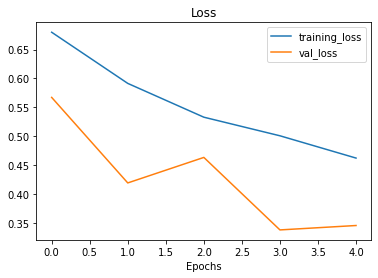

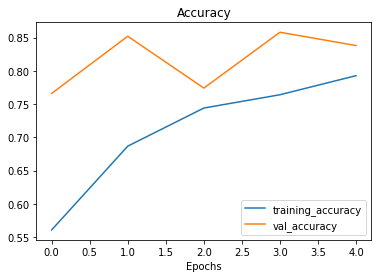

In [74]:
plot_loss_curves(history_6)

In [75]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

Repeat until satisified

Increase the number of model layers (e.g. add more convolutional layers).

Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).

Train for longer (more epochs).

Finding an ideal learning rate.

Get more data (give the model more opportunities to learn).

Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

In [76]:
#Making a prediction with our trained model

--2021-05-22 19:54:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-05-22 19:54:59 (65.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



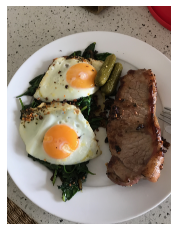

In [78]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [79]:
steak.shape

(4032, 3024, 3)

In [80]:
#Our model was trained on data in the shape of (batch_size, 224, 224, 3), so we need to reshape  (4032, 3024, 3)  to  (1, 224, 224, 3)

In [85]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3) and then adds another dimension
  """
  import tensorflow as tf
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  #add an extra dimension at axis 0
  img = tf.expand_dims(img, axis=0) 
  return img

In [87]:
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([1, 224, 224, 3])

In [88]:
pred = model_6.predict(steak)
pred

array([[0.7106976]], dtype=float32)

In [90]:
#Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).